# Ensemble Learning
Ensemble learning is a technique in machine learning where multiple models are trained and combined to achieve better predictive performance compared to using a single model. Ensemble learning can be used for both classification and regression tasks.

The basic idea behind ensemble learning is that multiple models, which may have different strengths and weaknesses, can work together to improve overall predictive accuracy. There are various approaches to ensemble learning, such as bagging, boosting, and stacking.

![](images/ensemble.png)

Bagging (bootstrap aggregating) is a method where multiple models are trained on different subsets of the training data. Each model is trained on a random subset of the training data, and predictions are made by aggregating the predictions of all the models. This technique helps to reduce overfitting by reducing the variance in the predictions.

Boosting is a technique where multiple models are trained iteratively, with each model trying to improve on the mistakes made by the previous model. The basic idea is to give more weight to examples that were misclassified by previous models. This technique helps to reduce bias and improve accuracy.

Stacking is a method where multiple models are trained and their predictions are used as features in a second-level model. The second-level model is trained on the predictions of the first-level models, and makes a final prediction based on this information.

Ensemble learning can be implemented using various machine learning algorithms, such as decision trees, neural networks, and support vector machines (SVMs). In the case of SVMs, ensemble learning can be used by training multiple SVMs with different hyperparameters or different kernels, and then combining their predictions.

Ensemble learning has been shown to be effective in improving predictive accuracy and reducing overfitting. However, it also has some drawbacks, such as increased computational complexity and difficulty in interpreting the final model. Overall, ensemble learning is a powerful technique that can be used to improve the performance of machine learning models.

Following code, generates moon dataset, splits it into training and validation sets, initializes three Random Forest Classifier models, trains them on the training set, evaluates their performance on the validation set, and then combines them into a Voting Classifier. Finally, the code trains the Voting Classifier on the training set and evaluates its performance on the validation set. As it can be seen, aggergating these model resulted in a better and more accurate model.

In "hard" voting, the class with the highest number of votes is selected as the final prediction. This means that the prediction is based on the mode of the predicted class labels.

In "soft" voting, the class probabilities predicted by each base classifier are averaged, and the class with the highest average probability is selected as the final prediction. This means that the prediction is based on the mean of the predicted class probabilities.

In general, "soft" voting can be more effective than "hard" voting when the base classifiers are capable of producing accurate class probabilities, rather than just class labels. This is because averaging the probabilities can provide a more nuanced and informative prediction than just selecting the mode of the class labels. However, "hard" voting can be simpler and more robust in situations where the probabilities are less reliable or less informative.

In [9]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate the moon dataset
X, y = make_moons(n_samples=10000, noise=0.4, random_state=20)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
rfc1 = RandomForestClassifier(n_estimators=100, random_state=42)
rfc2 = RandomForestClassifier(n_estimators=50, max_depth=4, random_state=42)
rfc3 = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42)

# Train the classifiers on the training set
rfc1.fit(X_train, y_train)
rfc2.fit(X_train, y_train)
rfc3.fit(X_train, y_train)

# Evaluate the individual classifiers on the validation set
y_pred_rfc1 = rfc1.predict(X_val)
y_pred_rfc2 = rfc2.predict(X_val)
y_pred_rfc3 = rfc3.predict(X_val)

print("Random Forest Classifier 1 accuracy:", accuracy_score(y_val, y_pred_rfc1))
print("Random Forest Classifier 2 accuracy:", accuracy_score(y_val, y_pred_rfc2))
print("Random Forest Classifier 3 accuracy:", accuracy_score(y_val, y_pred_rfc3))

# Combine the classifiers into a voting classifier
voting_clf = VotingClassifier(
    estimators=[('rfc1', rfc1), ('rfc2', rfc2), ('rfc3', rfc3)],
    voting='hard'
)

# Train the voting classifier on the training set
voting_clf.fit(X_train, y_train)

# Evaluate the voting classifier on the validation set
y_pred_voting = voting_clf.predict(X_val)
print("Voting Classifier accuracy:", accuracy_score(y_val, y_pred_voting))


Random Forest Classifier 1 accuracy: 0.8295
Random Forest Classifier 2 accuracy: 0.8465
Random Forest Classifier 3 accuracy: 0.8545
Voting Classifier accuracy: 0.854


## Bagging

Bagging (Bootstrap Aggregating) is a popular ensemble learning technique used in machine learning to improve the accuracy and stability of classification and regression models. The idea behind bagging is to train multiple instances of the same model on different subsets of the training data, then combine their predictions in some way to produce a final output.

Here's how the bagging process works:

1. Given a training set of size N, create K bootstrap samples of size $n$, where $n<N$. Each bootstrap sample is obtained by randomly selecting n examples from the original training set with replacement.
2. Train K instances of the same base model using the K bootstrap samples, resulting in K models that are slightly different due to the different training data.
3. When a new example is presented to the ensemble, all K models make a prediction on the example. For regression problems, the output is the mean of the K predictions. For classification problems, a majority vote is taken over the K models.

![](images/bagging.png)

The key benefit of bagging is that it can reduce the variance of the model, making it less sensitive to the training data and more robust to unseen examples. By using multiple bootstrap samples of the training set, the individual models learn from slightly different subsets of the data, which helps to reduce overfitting and improve the generalization performance of the ensemble.

In sklearn, the BaggingClassifier class can be used to implement bagging with different base estimators (e.g., decision trees, SVMs, etc.). The number of base estimators (K), the size of each bootstrap sample (n), and other hyperparameters can be tuned using cross-validation.

Here, with using decision classifier, we compare the performance of the a single model and bagging classifier on the moon dataset. As it can be concluded, the bagging classifier is perform better on the validation set and has a more reliable decision boundary. 

The bootstrap parameter is a boolean flag indicating whether bootstrap samples should be used when building base estimators. If True, then the BaggingClassifier will draw random samples with replacement from the training set to create multiple datasets, each of which is used to train a separate base estimator. If False, the BaggingClassifier will use the entire training set to train each base estimator.

Setting bootstrap=True can help to reduce overfitting by increasing the diversity of the base estimators, since each estimator is trained on a slightly different subset of the training data. However, it can also increase the computational complexity of the model, since each estimator must be trained on a separate dataset.

Single Decision Tree Accuracy: 0.845
Bagging Classifier Accuracy: 0.89


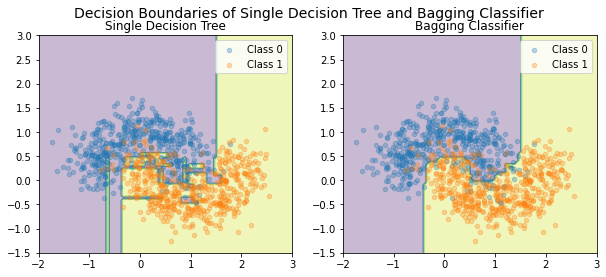

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Generate the moon dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=20)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the single decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Define the bagging classifier with decision tree base estimator
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1,
    random_state=42)

# Fit the bagging classifier
bag_clf.fit(X_train, y_train)

# Evaluate the performance of the models
print("Single Decision Tree Accuracy:", tree_clf.score(X_val, y_val))
print("Bagging Classifier Accuracy:", bag_clf.score(X_val, y_val))

# Plot the decision boundaries of the models
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
plt.suptitle("Decision Boundaries of Single Decision Tree and Bagging Classifier", fontsize=14)

# Plot the decision boundary of the single decision tree
ax = axes[0]
ax.set_title("Single Decision Tree")
x1s = np.linspace(-2, 3, 100)
x2s = np.linspace(-1.5, 3, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree_clf.predict(X_new).reshape(x1.shape)
ax.contourf(x1, x2, y_pred, alpha=0.3)
ax.scatter(X[:, 0][y==0], X[:, 1][y==0], s=20, label="Class 0", alpha=0.3)
ax.scatter(X[:, 0][y==1], X[:, 1][y==1], s=20, label="Class 1", alpha=0.3)
ax.legend()

# Plot the decision boundary of the bagging classifier
ax = axes[1]
ax.set_title("Bagging Classifier")
x1s = np.linspace(-2, 3, 100)
x2s = np.linspace(-1.5, 3, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = bag_clf.predict(X_new).reshape(x1.shape)
ax.contourf(x1, x2, y_pred, alpha=0.3)
ax.scatter(X[:, 0][y==0], X[:, 1][y==0], s=20, label="Class 0", alpha=0.3)
ax.scatter(X[:, 0][y==1], X[:, 1][y==1], s=20, label="Class 1", alpha=0.3)
ax.legend()

plt.show()

## Random Forests
Random forests is a popular ensemble learning algorithm that combines multiple decision trees to improve the overall predictive performance. It was first introduced by Leo Breiman and Adele Cutler in 2001.

The basic idea of random forests is to build a large number of decision trees, each using a random subset of the features and a random subset of the data samples. Then, the predictions of all the trees are aggregated to make the final prediction.

The main advantage of using random forests is that it reduces the variance of the model compared to a single decision tree, which can overfit the training data. By using multiple trees with different subsets of features and data, random forests can capture a wider range of relationships between the features and the target variable, and avoid overfitting.

The key hyperparameters of a random forest algorithm include the number of trees (n_estimators), the number of features to consider at each split (max_features), the depth of the trees (max_depth), and the criterion used to split the nodes (gini impurity or entropy).

In scikit-learn, we can use the RandomForestClassifier class to build a random forest model. Here's an example code snippet that uses a random forest classifier on the Iris dataset.

In [29]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Build a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Evaluate the model on the test data
score = rfc.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.9


### Calculating feature importance using random forests
In a random forest, feature importance can be calculated by evaluating the decrease in impurity that is achieved by each feature. The decrease in impurity is calculated based on the number of times a feature is used to split the data and the amount of impurity reduction achieved by each split.

The scikit-learn implementation of random forests provides a feature_importances_ attribute that can be used to access the feature importances. The feature importances are normalized such that they sum to 1.0.

In [30]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load the iris dataset
iris = load_iris()

# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the iris dataset
rfc.fit(iris.data, iris.target)

# Get the feature importances
importances = rfc.feature_importances_

# Print the feature importances
for i, importance in enumerate(importances):
    print(f"Feature {i}: {importance:.3f}")

Feature 0: 0.106
Feature 1: 0.022
Feature 2: 0.436
Feature 3: 0.436


## Extra Trees
Extra Trees (Extremely Randomized Trees) is an ensemble learning method based on the Random Forest algorithm. The primary difference between Random Forest and Extra Trees is that Extra Trees builds a large number of decision trees and splits each node of every tree on a random subset of features, rather than searching for the best split.

In Extra Trees, the splitting of a node is determined by randomly selecting a threshold for each feature under consideration, rather than selecting the optimal threshold as in standard decision trees. This randomization reduces the variance of the model and makes Extra Trees less sensitive to noise and outliers than traditional decision trees.

The training process for Extra Trees involves constructing a forest of decision trees, with each tree constructed from a random subset of the training data and a random subset of features at each split. During prediction, the output of each tree in the forest is averaged to generate the final prediction. The number of trees and the subset of features used in each tree are hyperparameters that can be tuned for optimal performance.

Extra Trees can be used for classification and regression tasks, and like Random Forests, it provides an estimate of feature importance, which can be used for feature selection. In comparison to Random Forests, Extra Trees can be faster to train and predict, especially for high-dimensional datasets with many features.

In summary, Extra Trees is an extension of Random Forests that adds more randomization to the tree-building process, making it less sensitive to noise and outliers while potentially increasing its speed.

## Boosting
Boosting is another popular ensemble learning technique in machine learning where a set of weak models are combined to form a strong model. The idea behind boosting is to create a sequence of models that learn from the mistakes of the previous models, with the goal of reducing the overall error. The key difference between bagging and boosting is that while bagging creates a set of independent models, boosting creates a sequence of dependent models.

The general idea of boosting is that it combines several weak classifiers to form a strong classifier. At each iteration of the boosting algorithm, a new weak classifier is trained on the training data, and the weights of the misclassified samples are increased. This way, the algorithm learns to focus on the samples that are harder to classify.

![](images/boosting.png)

There are several boosting algorithms, including AdaBoost (Adaptive Boosting) and Gradient Boosting. AdaBoost is a popular boosting algorithm that works by iteratively re-weighting the training data such that samples that were misclassified in the previous iteration are given more weight. This way, the algorithm learns to focus on the samples that are harder to classify. At each iteration, a new weak classifier is trained on the re-weighted data, and the weights of the misclassified samples are increased.

Gradient Boosting, on the other hand, works by iteratively adding new weak classifiers to the model, where each new weak classifier is trained to correct the errors made by the previous weak classifiers. The basic idea behind Gradient Boosting is to fit a series of decision trees to the data, with each tree attempting to correct the errors of the previous tree. In Gradient Boosting, the loss function is optimized using gradient descent.

In both AdaBoost and Gradient Boosting, the final prediction is made by combining the predictions of all the weak classifiers. Typically, the weights of the weak classifiers are assigned based on their accuracy on the training data.

One advantage of boosting is that it can improve the performance of weak classifiers, which are often simpler and faster to train than strong classifiers. Additionally, boosting can be used to reduce overfitting by forcing the model to focus on the most informative samples. However, boosting is also more sensitive to noisy data and outliers, which can have a large impact on the performance of the model.

### AdaBoost VS. GradientBoosting

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an AdaBoostClassifier with a DecisionTreeClassifier base estimator
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

# Train a GradientBoostingClassifier with a DecisionTreeClassifier base estimator
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=1, random_state=42)
gb_clf.fit(X_train, y_train)

# Calculate the accuracy of the classifiers on the test set
ada_acc = accuracy_score(y_test, ada_clf.predict(X_test))
gb_acc = accuracy_score(y_test, gb_clf.predict(X_test))

print(f"AdaBoostClassifier accuracy: {ada_acc:.3f}")
print(f"GradientBoostingClassifier accuracy: {gb_acc:.3f}")


c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier accuracy: 0.974
GradientBoostingClassifier accuracy: 0.947


### XGBoost
XGBoost (Extreme Gradient Boosting) is a powerful and scalable gradient boosting framework that has become a popular algorithm in machine learning competitions and industry applications. It was first introduced in 2014 by Tianqi Chen.

XGBoost is based on the gradient boosting framework, which involves building an ensemble of weak decision trees that are sequentially added to improve the overall accuracy of the model. However, XGBoost has several unique features that distinguish it from other gradient boosting frameworks:

1. Regularization: XGBoost offers both L1 and L2 regularization to prevent overfitting and improve the generalization of the model.
2. Parallel processing: XGBoost can be run in parallel on a single machine using all available CPU cores or distributed across multiple machines.
3. Scalability: XGBoost is highly scalable and can handle large datasets with millions of rows and thousands of columns.
4. Tree pruning: XGBoost includes a process of tree pruning to remove splits that do not contribute to improving the accuracy of the model, which can reduce overfitting.
5. Handling missing values: XGBoost can handle missing values in the input data, automatically learning how to best use them for making predictions.
6. Built-in cross-validation: XGBoost includes built-in cross-validation to automatically determine the optimal number of trees to add to the model.
7. Customizable loss function: XGBoost allows users to define their own loss function, which can be useful for certain types of problems.

XGBoost has been widely used in various machine learning applications, including natural language processing, image classification, and predictive maintenance. Its scalability and accuracy have made it a popular choice for many data science competitions on platforms like Kaggle.

In [8]:
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost classifier
xgb_clf = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_clf.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9649122807017544


## Stacking

Stacking (short for stacked generalization) is an ensemble learning technique that involves training multiple base models to make predictions on a dataset, and then using the output of those base models as input to a meta-model that makes the final predictions. The idea behind stacking is to combine the strengths of multiple models in order to create a more accurate and robust prediction model.

The stacking process involves the following steps:

1. Split the training data into K folds.
2. Train K different base models on K-1 folds of the training data, and use each of these models to make predictions on the remaining 1 fold. This generates K sets of predictions, one for each fold.
3. Combine the K sets of predictions to create a new training set. Each example in the new training set has K predictions associated with it.
4. Train a meta-model on the new training set. The meta-model takes as input the K sets of predictions generated by the base models, and outputs the final prediction for each example.
5. Use the trained meta-model to make predictions on the test data.

![](images/stacking.png)

In practice, there are many ways to implement stacking, and the details of the process can vary depending on the specific application. For example, different base models can be used, and different meta-models can be trained to combine the predictions. The choice of base models and meta-models can have a significant impact on the performance of the stacking ensemble.

Stacking has several advantages over other ensemble techniques such as bagging and boosting. One advantage is that it can be used with any type of base model, which allows for a more flexible and adaptable approach to ensemble learning. Another advantage is that stacking can be used to create highly accurate and robust prediction models, especially when the base models are diverse and complementary to each other.

However, there are also some challenges associated with stacking, such as the potential for overfitting if the base models are too complex, and the computational complexity of training and combining multiple models. Nevertheless, stacking remains a popular and effective technique in the field of machine learning, and has been used successfully in a wide range of applications.